In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Walmart-Retail-Dataset.csv", low_memory=False)
df.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,2020-03-02,Delivery Truck,3.77250935407099,Wisconsin,3.29,54481
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,2020-03-07,Delivery Truck,816.340893505794,Wisconsin,258.98,54481
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.9388,Central,6129.06,2021-11-15,Delivery Truck,4530.50598327659,Texas,145.98,76051
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.9,2020-08-08,Regular Air,128.73150520457,Arizona,6.68,85281
4,Coconut Creek,80,Raymond Fair,Home Office,0.14,2021-08-13,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44,\N,...,Storage & Organization,24750.4921,South,1875.28,2021-08-18,Express Air,33.608384882948,Florida,42.76,33063


In [ ]:
df[['product_category', 'product_container',
       'product_name']].head()

,product_category,product_container,product_name
0,Furniture,Jumbo Drum,Global Enterprise Series Seating Low-Back Swiv...
1,Furniture,Jumbo Drum,Global Enterprise Series Seating Low-Back Swiv...
2,Furniture,Jumbo Box,Bevis Rectangular Conference Tables
3,Office Supplies,Small Box,Xerox 1923
4,Office Supplies,Small Box,SAFCO Mobile Desk Side File Wire Frame


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037247 entries, 0 to 1037246
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   city                  1037237 non-null  object
 1   customer_age          1037245 non-null  object
 2   customer_name         1037231 non-null  object
 3   customer_segment      1034663 non-null  object
 4   discount              1037245 non-null  object
 5   order_date            1037245 non-null  object
 6   order_id              1037245 non-null  object
 7   order_priority        1035100 non-null  object
 8   order_quantity        1037245 non-null  object
 9   product_base_margin   1037245 non-null  object
 10  product_category      1037245 non-null  object
 11  product_container     1032511 non-null  object
 12  product_name          1032500 non-null  object
 13  product_sub_category  1032511 non-null  object
 14  profit                1032511 non-null  object
 15

In [ ]:
df.describe()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
count,1037237,1037245,1037231,1034663,1037245,1037245,1037245,1035100,1037245,1037245,...,1032511,1032511,1032511,1032511,1032490,1029067,1032425,1032490,1032490,1032490
unique,6176,72,5539,5,27,1478,1032514,6,72,52,...,18,968242,17640,192378,11601,1480,1010935,17685,778,1434
top,Pearl,79,Jonathan Doherty,Corporate,0.16,2022-11-04,"Regular Air""",High,32,0.37,...,Paper,Rulers and Trimmers,East,East,2022-05-04,Express Air,Regular Air,California,6.48,6.84
freq,823,14948,1464,258368,41720,809,1612,206904,21394,92472,...,151369,17636,324297,5589,788,338700,5918,77065,32579,1615


In [ ]:
df = df[df['order_id'].str.len() == 36]

In [ ]:
df = df[pd.to_numeric(df['sales'], errors='coerce').notna()]

In [ ]:
df = df[df['region'].astype(str).str.isalpha()]

In [ ]:
df = df[pd.to_numeric(df['shipping_cost'], errors='coerce').notna()]

In [ ]:
df.describe()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
count,1010274,1010274,1010260,1007743,1010274,1010274,1010274,1008166,1010274,1010274,...,1010274,1010274,1010274,1010274,1010274,1006867,1010274,1010274,1010274,1010274
unique,1420,71,784,4,26,1470,1010274,5,50,52,...,17,963739,4,192327,1479,3,1010274,47,729,1411
top,Mason,79,Jonathan Doherty,Corporate,0.16,2020-03-26,a42c8cff-5757-4e94-80b0-807538fefd25,High,32,0.37,...,Paper,3093.24897,East,86.4,2022-05-04,Express Air,3.77250935407099,California,6.48,63129
freq,802,14643,1431,252843,40802,788,1,202463,20942,92407,...,151264,4,323053,202,782,337174,1,76752,32553,1495


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(1002238, 23)

In [ ]:
df.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,2020-03-02,Delivery Truck,3.77250935407099,Wisconsin,3.29,54481
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,2020-03-07,Delivery Truck,816.340893505794,Wisconsin,258.98,54481
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.9388,Central,6129.06,2021-11-15,Delivery Truck,4530.50598327659,Texas,145.98,76051
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.9,2020-08-08,Regular Air,128.73150520457,Arizona,6.68,85281
4,Coconut Creek,80,Raymond Fair,Home Office,0.14,2021-08-13,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44,\N,...,Storage & Organization,24750.4921,South,1875.28,2021-08-18,Express Air,33.608384882948,Florida,42.76,33063


In [ ]:
numeric_columns = ['discount', 'order_quantity', 'product_base_margin', 'profit', 'sales', 'shipping_cost', 'unit_price', 'customer_age']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002238 entries, 0 to 1037246
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   city                  1002238 non-null  object        
 1   customer_age          1002238 non-null  int64         
 2   customer_name         1002238 non-null  object        
 3   customer_segment      1002238 non-null  object        
 4   discount              1002238 non-null  float64       
 5   order_date            1002238 non-null  datetime64[ns]
 6   order_id              1002238 non-null  object        
 7   order_priority        1002238 non-null  object        
 8   order_quantity        1002238 non-null  int64         
 9   product_base_margin   994456 non-null   float64       
 10  product_category      1002238 non-null  object        
 11  product_container     1002238 non-null  object        
 12  product_name          1002238 non-null  object 

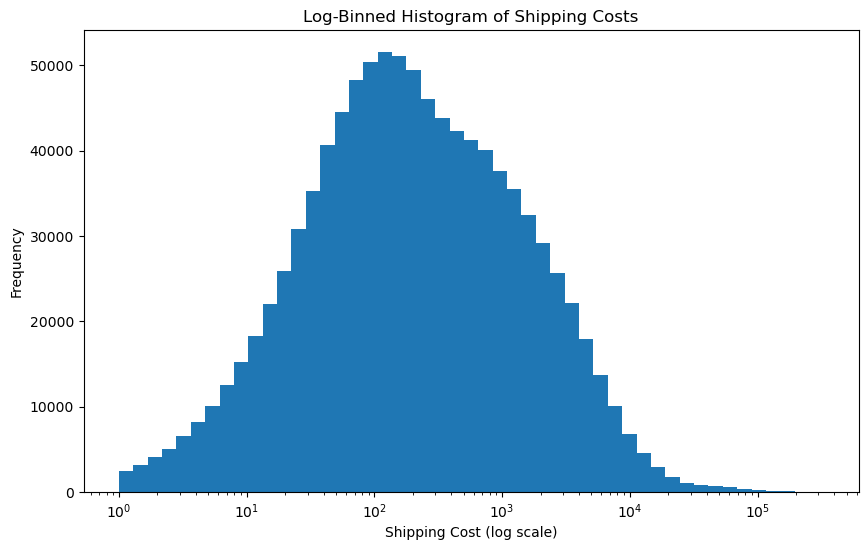

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['shipping_cost'], bins=np.logspace(0, np.log10(df['shipping_cost'].max()), 50))
plt.xscale('log')
plt.title('Log-Binned Histogram of Shipping Costs')
plt.xlabel('Shipping Cost (log scale)')
plt.ylabel('Frequency')
plt.show()

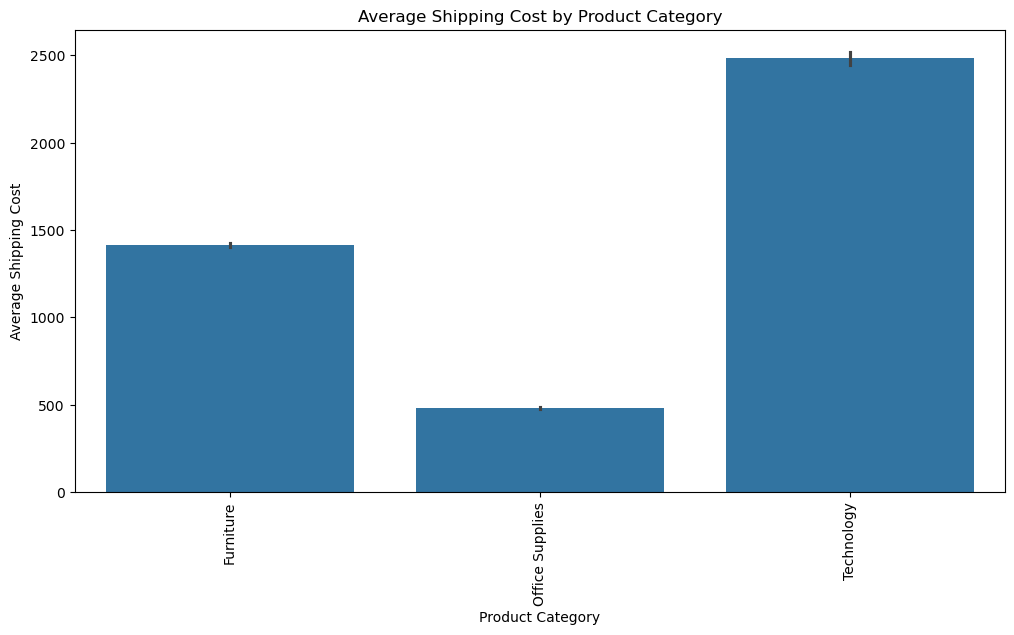

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category', y='shipping_cost', data=df, estimator='mean')
plt.title('Average Shipping Cost by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Cost')
plt.xticks(rotation=90)
plt.show()

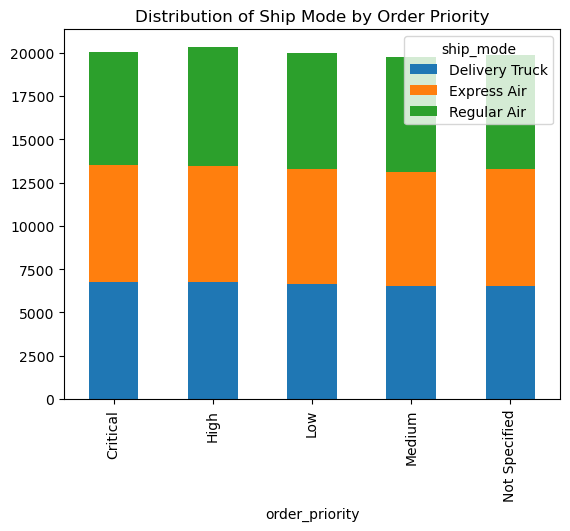

In [ ]:
df1 = df.head(100000)
pd.crosstab(df1['order_priority'], df1['ship_mode']).plot(kind='bar', stacked=True)
plt.title('Distribution of Ship Mode by Order Priority')
plt.savefig("graph1.jpg")

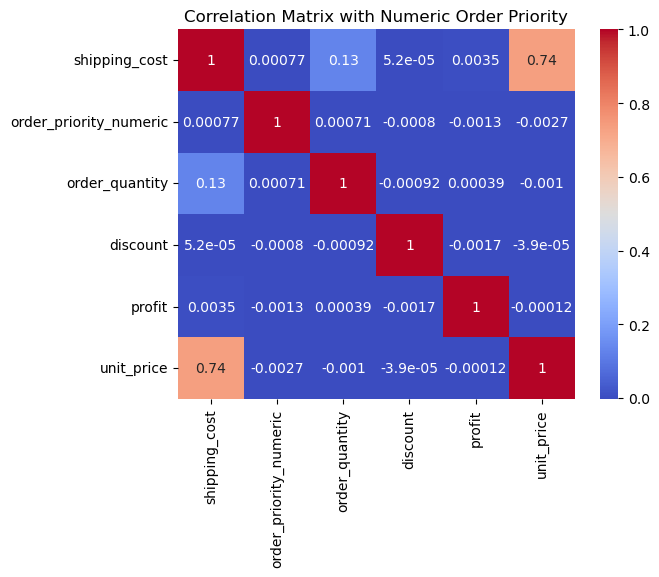

In [ ]:
priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4, 'Not Specified': None}
df['order_priority_numeric'] = df['order_priority'].map(priority_mapping)

corr_matrix = df[['shipping_cost', 'order_priority_numeric', 'order_quantity', 'discount', 'profit', 'unit_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Numeric Order Priority')
plt.savefig("graph2.jpg")

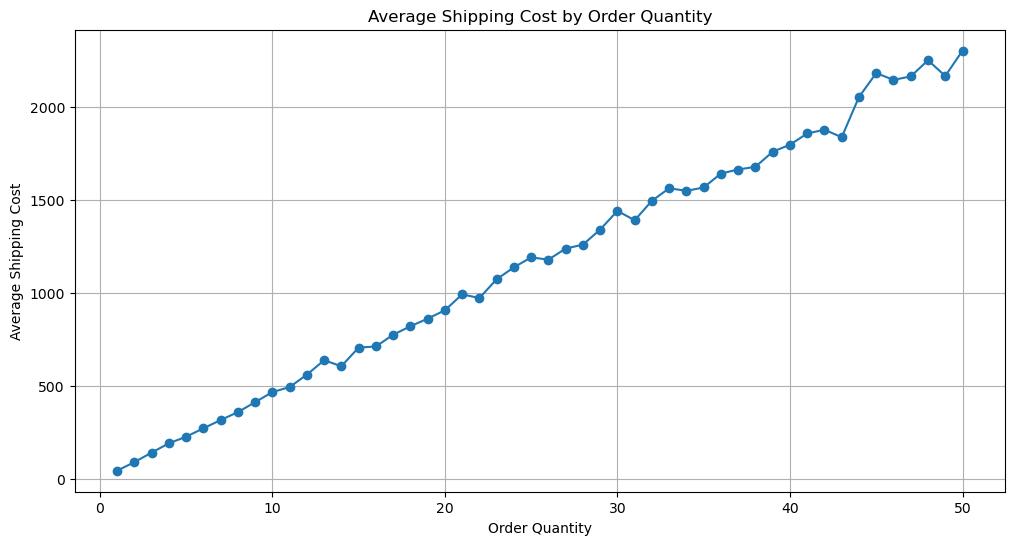

In [ ]:
avg_shipping_cost_per_quantity = df.groupby('order_quantity')['shipping_cost'].mean()

plt.figure(figsize=(12, 6))
avg_shipping_cost_per_quantity.plot(kind='line', marker='o')
plt.title('Average Shipping Cost by Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Average Shipping Cost')
plt.grid(True)
plt.savefig(fname="graph3.jpg")

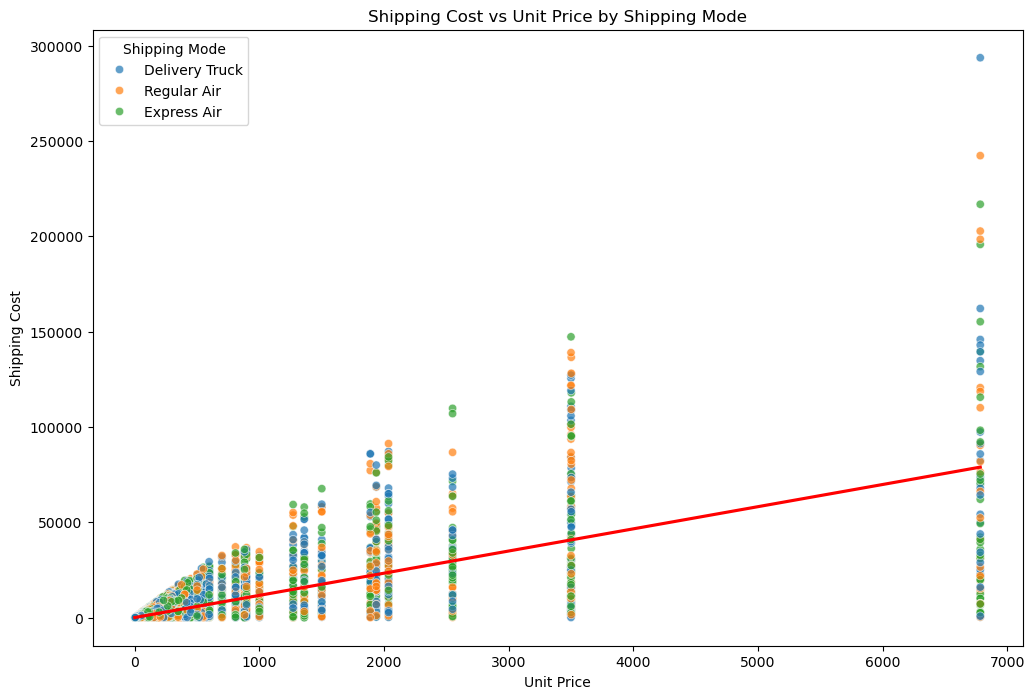

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='unit_price', y='shipping_cost', hue='ship_mode', alpha=0.7)
sns.regplot(data=df1, x='unit_price', y='shipping_cost', scatter=False, color='red', ci=None)
plt.title('Shipping Cost vs Unit Price by Shipping Mode')
plt.xlabel('Unit Price')
plt.ylabel('Shipping Cost')
plt.legend(title='Shipping Mode')
plt.savefig("graph4.jpg")

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
numerical_stats = df[['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'profit', 'sales', 'shipping_cost', 'unit_price']].describe()
numerical_stats

,customer_age,discount,order_quantity,product_base_margin,profit,sales,shipping_cost,unit_price
count,"1,002,238.00","1,002,238.00","1,002,238.00","994,456.00","1,002,238.00","1,002,238.00","1,002,238.00","1,002,238.00"
mean,55.01,0.13,25.49,0.51,"6,560.12","2,330.79","1,167.72",91.73
std,20.22,0.07,14.15,0.13,"11,942.90","8,515.71","4,993.31",290.43
min,20.00,0.00,1.00,0.35,"-14,139.88",0.76,0.00,0.99
25%,37.00,0.06,13.00,0.38,"-3,781.79",138.26,49.36,6.48
50%,55.00,0.12,25.00,0.52,"6,581.26",464.94,184.45,22.84
75%,73.00,0.19,38.00,0.59,"16,899.83","1,911.97",812.26,89.99
max,90.00,0.25,50.00,0.85,"27,219.99","339,147.50","327,900.41","6,783.02"


In [ ]:
for col in ['customer_segment', 'order_priority', 'product_category', 'ship_mode']:
    print(df[col].value_counts(normalize=True) * 100)

customer_segment
Corporate        25.09
Home Office      25.05
Small Business   25.04
Consumer         24.82
Name: proportion, dtype: float64
order_priority
High            20.08
Critical        20.06
Not Specified   20.05
Low             20.01
Medium          19.79
Name: proportion, dtype: float64
product_category
Office Supplies   53.43
Technology        23.69
Furniture         22.88
Name: proportion, dtype: float64
ship_mode
Express Air      33.49
Regular Air      33.38
Delivery Truck   33.13
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['order_priority', 'ship_mode', 'unit_price', 'order_quantity', 'profit']
target = 'shipping_cost'

X = df[features]
y = df[target]

categorical_features = ['order_priority', 'ship_mode']
numeric_features = ['unit_price', 'order_quantity', 'profit']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)

y_pred_val = ridge_pipeline.predict(X_val)
y_pred_train = ridge_pipeline.predict(X_train)

mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
r2_train = r2_score(y_train, y_pred_train)

print("Validation Set Metrics:")
print("Mean Absolute Error (MAE):", mae_val)
print("R-squared (R2):", r2_val)

print("\nTraining Set Metrics:")
print("R-squared (R2):", r2_train)


Validation Set Metrics:
Mean Absolute Error (MAE): 968.8029175362393
R-squared (R2): 0.5622791571735768

Training Set Metrics:
R-squared (R2): 0.559361810692151


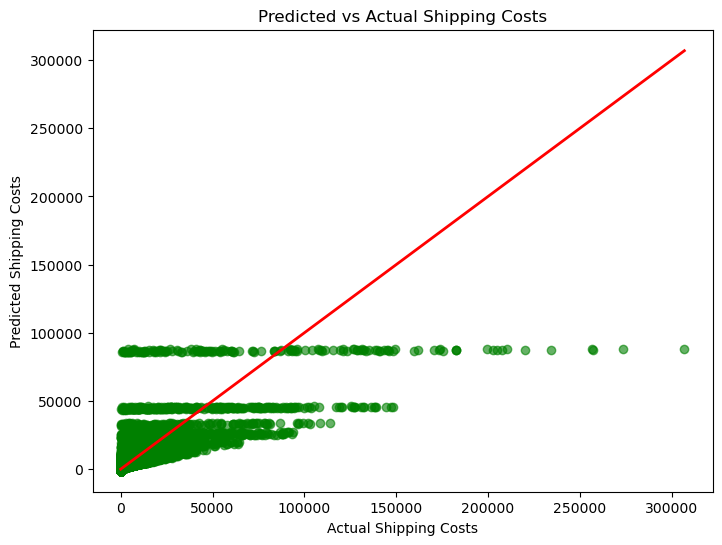

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, alpha=0.6, color='green')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)  # Perfect prediction line
plt.xlabel('Actual Shipping Costs')
plt.ylabel('Predicted Shipping Costs')
plt.title('Predicted vs Actual Shipping Costs')
plt.show()

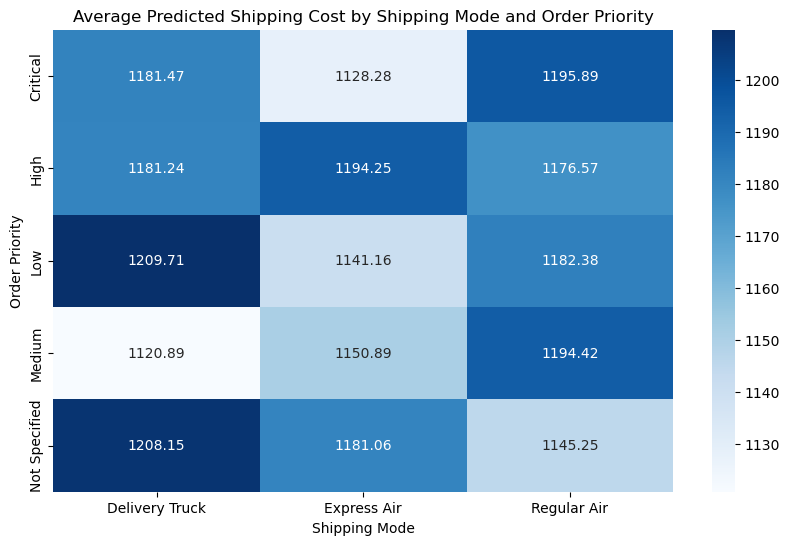

In [ ]:
X_val['Predicted Cost'] = y_pred_val

heatmap_data = X_val.groupby(['order_priority', 'ship_mode']).mean()['Predicted Cost'].unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Predicted Shipping Cost by Shipping Mode and Order Priority')
plt.xlabel('Shipping Mode')
plt.ylabel('Order Priority')
plt.show()

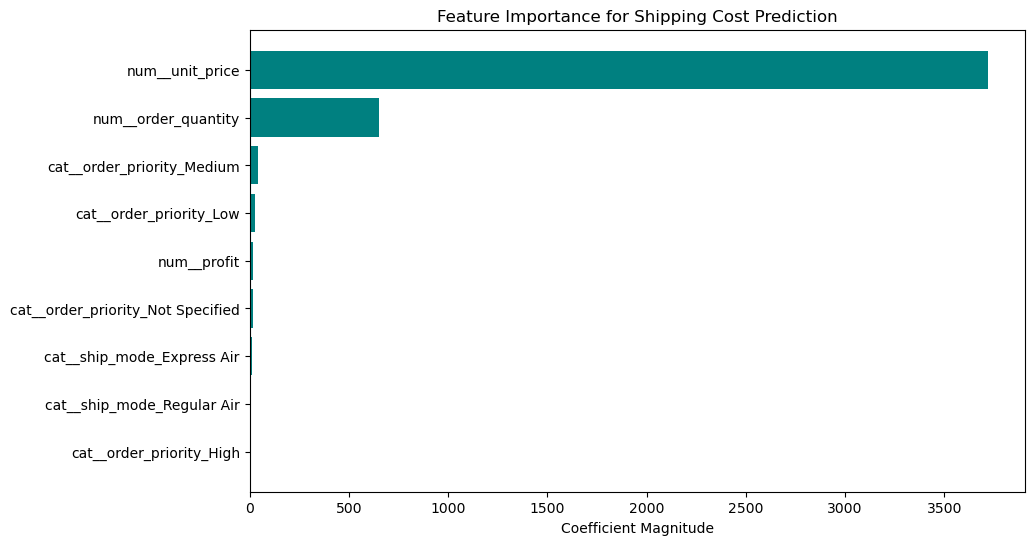

In [ ]:
feature_names = ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = ridge_pipeline.named_steps['ridge'].coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': np.abs(coefficients)})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance for Shipping Cost Prediction')
plt.gca().invert_yaxis()
plt.show()

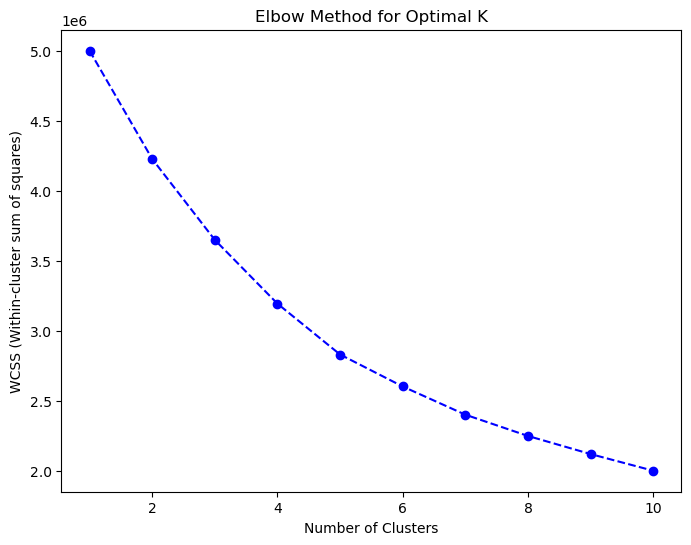

In [ ]:
from sklearn.cluster import KMeans

features = ['customer_age', 'order_quantity', 'sales', 'profit', 'product_category']

X = df[features]

numerical_features = ['customer_age', 'order_quantity', 'sales', 'profit']
categorical_features = ['product_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X_processed = kmeans_pipeline.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_processed)

df['Cluster'] = y_kmeans

In [ ]:
cluster_profiles = df.groupby('Cluster').agg({
    'customer_age': ['mean', 'std'],
    'order_quantity': ['mean', 'std'],
    'sales': ['mean', 'std'],
    'profit': ['mean', 'std'],
    'product_category': 'unique',
})

print(cluster_profiles)

        customer_age       order_quantity           sales              profit  \
                mean   std           mean  std       mean       std      mean   
Cluster                                                                         
0              35.87 10.05          36.97 8.22   2,867.53  5,171.15  7,661.33   
1              56.93 18.67          13.89 8.15   1,021.86  2,351.49 17,819.96   
2              53.29 18.66          13.97 8.19   1,001.73  2,205.87 -4,805.41   
3              74.10 10.06          37.07 8.16   2,886.43  5,211.11  5,524.61   
4              54.68 20.02          36.05 9.95 112,140.86 60,806.82  6,956.49   

                                           product_category  
              std                                    unique  
Cluster                                                      
0       10,998.97  [Furniture, Office Supplies, Technology]  
1        5,945.02  [Furniture, Office Supplies, Technology]  
2        5,915.42  [Furniture, Technology

In [ ]:
data = {
    "Cluster": [0, 1, 2, 3, 4],
    "Avg Age (±std)": ["35.87 (±10.05)", "56.93 (±18.67)", "53.29 (±18.66)", "74.10 (±10.06)", "54.68 (±20.02)"],
    "Order Qty (±std)": ["36.97 (±8.22)", "13.89 (±8.15)", "13.97 (±8.19)", "37.07 (±8.16)", "36.05 (±9.95)"],
    "Sales (±std)": ["$2,867.53 (±$5,171.15)", "$1,021.86 (±$2,351.49)", "$1,001.73 (±$2,205.87)",
                     "$2,886.43 (±$5,211.11)", "$112,140.86 (±$60,806.82)"],
    "Profit (±std)": ["$7,661.33 (±$10,998.97)", "$17,819.96 (±$5,945.02)", "-$4,805.41 (±$5,915.42)",
                      "$5,524.61 (±$10,990.79)", "$6,956.49 (±$11,991.08)"],
    "Product Categories": [
        "Furniture, Office Supplies, Technology",
        "Furniture, Office Supplies, Technology",
        "Furniture, Technology, Office Supplies",
        "Office Supplies, Technology, Furniture",
        "Technology, Office Supplies"
    ],
}

cluster_profiles_df = pd.DataFrame(data)

cluster_profiles_df.set_index("Cluster", inplace=True)

cluster_profiles_df

,Avg Age (±std),Order Qty (±std),Sales (±std),Profit (±std),Product Categories
Cluster,,,,,
0,35.87 (±10.05),36.97 (±8.22),"$2,867.53 (±$5,171.15)","$7,661.33 (±$10,998.97)","Furniture, Office Supplies, Technology"
1,56.93 (±18.67),13.89 (±8.15),"$1,021.86 (±$2,351.49)","$17,819.96 (±$5,945.02)","Furniture, Office Supplies, Technology"
2,53.29 (±18.66),13.97 (±8.19),"$1,001.73 (±$2,205.87)","-$4,805.41 (±$5,915.42)","Furniture, Technology, Office Supplies"
3,74.10 (±10.06),37.07 (±8.16),"$2,886.43 (±$5,211.11)","$5,524.61 (±$10,990.79)","Office Supplies, Technology, Furniture"
4,54.68 (±20.02),36.05 (±9.95),"$112,140.86 (±$60,806.82)","$6,956.49 (±$11,991.08)","Technology, Office Supplies"


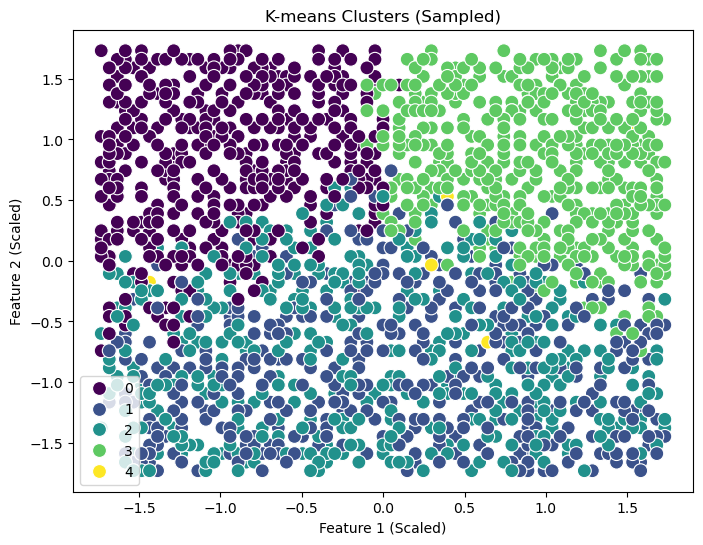

In [ ]:
plot_sample_idx = np.random.choice(X_processed.shape[0], size=2000, replace=False)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_processed[plot_sample_idx, 0], y=X_processed[plot_sample_idx, 1], hue=y_kmeans[plot_sample_idx], palette='viridis', s=100)
plt.title('K-means Clusters (Sampled)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.savefig('kmeans.jpg')